 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
path_whales = Path("Resources/whale_returns.csv")
whales_df = pd.read_csv(path_whales, index_col="Date", infer_datetime_format=True, parse_dates=True)
whales_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whales_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whales_df = whales_df.dropna()
whales_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
path_algo = Path("Resources/algo_returns.csv")
algo_df = pd.read_csv(path_algo, index_col="Date", infer_datetime_format=True, parse_dates=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_df = algo_df.dropna()
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
path_sp500 = Path("Resources/sp500_history.csv")
sp500_df = pd.read_csv(path_sp500, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_df = sp500_df.dropna()
sp500_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [9]:
# Check Data Types
print("----------------")
print("Whales datafame:\n")
print(whales_df.dtypes, "\n")
print("----------------")
print("Algorithmic datafame:\n")
print(algo_df.dtypes, "\n")
print("----------------")
print("S&P 500 datafame:\n")
print(sp500_df.dtypes, "\n")
print("----------------")

----------------
Whales datafame:

SOROS FUND MANAGEMENT LLC      float64
PAULSON & CO.INC.              float64
TIGER GLOBAL MANAGEMENT LLC    float64
BERKSHIRE HATHAWAY INC         float64
dtype: object 

----------------
Algorithmic datafame:

Algo 1    float64
Algo 2    float64
dtype: object 

----------------
S&P 500 datafame:

Close    object
dtype: object 

----------------


In [10]:
# Fix Data Types
sp500_df["Close"] = sp500_df["Close"].str.replace("$", "")
sp500_df["Close"] = sp500_df["Close"].astype("float")
sp500_df.dtypes

Close    float64
dtype: object

In [11]:
# Calculate Daily Returns
sp500_return = sp500_df.pct_change()
sp500_return.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [12]:
# Drop nulls
sp500_return = sp500_return.dropna()

In [13]:
# Rename `Close` Column to be specific to this portfolio.
sp500_return.rename(columns={"Close": "S&P 500"}, inplace=True)

## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat([whales_df, algo_df, sp500_return], axis = "columns", join = "inner")
combined_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

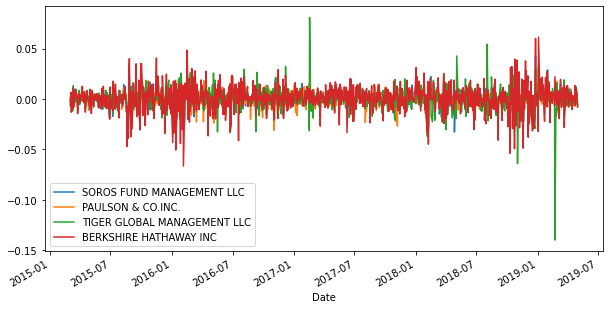

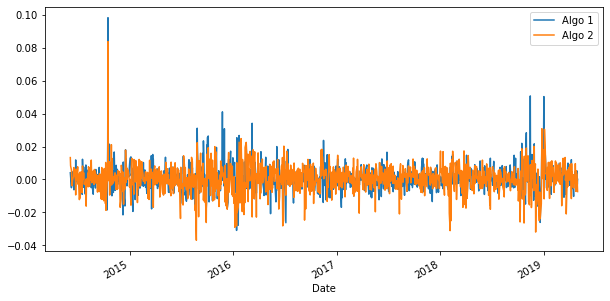

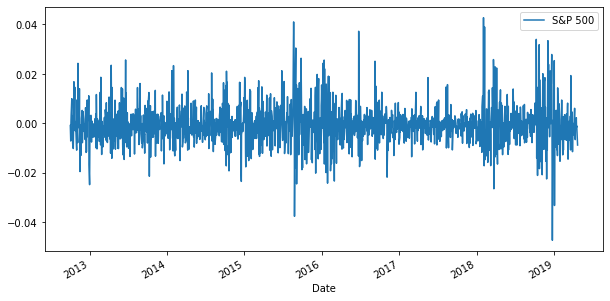

In [15]:
# Plot daily returns of all portfolios
whales_df.plot(figsize=(10, 5))
algo_df.plot(figsize=(10, 5))
sp500_return.plot(figsize=(10, 5))

#### Calculate and Plot cumulative returns.

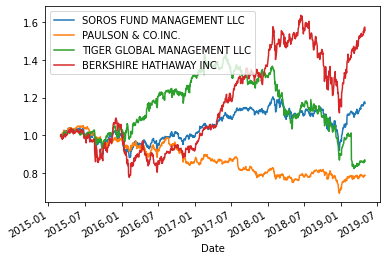

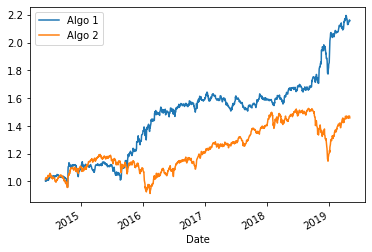

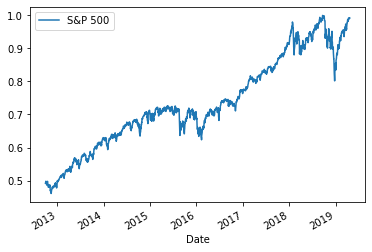

In [16]:
# Calculate cumulative returns of all portfolios
whales_cumulative = (1 + whales_df).cumprod()
algo_cumulative = (1 + algo_df).cumprod()
sp500_cumulative = (1 + sp500_return).cumprod()

# Plot cumulative returns
whales_cumulative.plot()
algo_cumulative.plot()
sp500_cumulative.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


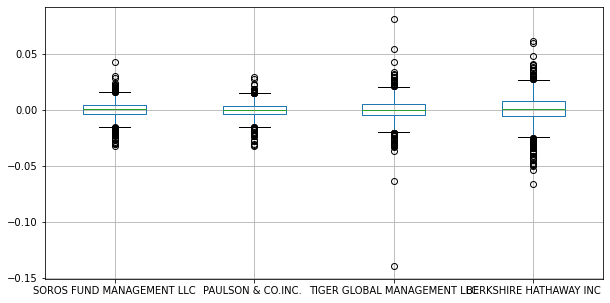

In [17]:
# Box plot to visually show risk
whales_df.boxplot(figsize = (10,5))

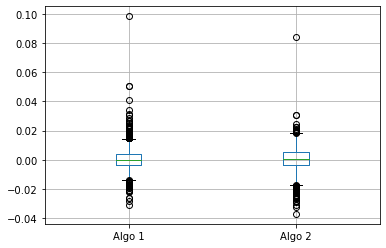

In [18]:
algo_df.boxplot()

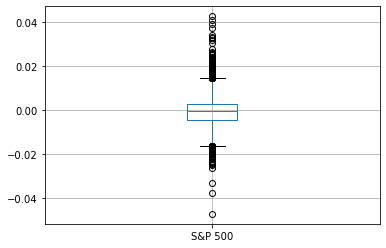

In [19]:
sp500_return.boxplot()

### Calculate Standard Deviations

In [20]:
# Calculate the daily standard deviations of all portfolios
whales_std = whales_df.std()
algo_std = algo_df.std()
combined_std = pd.concat([whales_std, algo_std], axis='rows', join='inner')

### Determine which portfolios are riskier than the S&P 500

In [21]:
# Calculate  the daily standard deviation of S&P 500
sp500_std = sp500_return.std()
# Determine which portfolios are riskier than the S&P 500

for i in combined_std.index:
    if combined_std[i] > float(sp500_std):
        print(i, 'is riskier than the S&P 500')
    else: 
        print(i, 'is less risky than the S&P 500')

SOROS FUND MANAGEMENT LLC is less risky than the S&P 500
PAULSON & CO.INC.  is less risky than the S&P 500
TIGER GLOBAL MANAGEMENT LLC is riskier than the S&P 500
BERKSHIRE HATHAWAY INC is riskier than the S&P 500
Algo 1 is less risky than the S&P 500
Algo 2 is riskier than the S&P 500


### Calculate the Annualized Standard Deviation

In [22]:
# Calculate the annualized standard deviation (252 trading days)
annualized_whales_std = whales_std * np.sqrt(252)
annualized_algo_std = algo_std * np.sqrt(252)
annualized_sp500_std = sp500_std * np.sqrt(252)

print("----------------")
print("Whales Annualized Std. dev.:\n")
print(annualized_whales_std, "\n")
print("----------------")
print("Algorithmic Annualized Std. dev.:\n")
print(annualized_algo_std, "\n")
print("----------------")
print("S&P 500 Annualized Std. dev.:\n")
print(annualized_sp500_std, "\n")
print("----------------")

----------------
Whales Annualized Std. dev.:

SOROS FUND MANAGEMENT LLC      0.124487
PAULSON & CO.INC.              0.110754
TIGER GLOBAL MANAGEMENT LLC    0.171830
BERKSHIRE HATHAWAY INC         0.203682
dtype: float64 

----------------
Algorithmic Annualized Std. dev.:

Algo 1    0.126801
Algo 2    0.134401
dtype: float64 

----------------
S&P 500 Annualized Std. dev.:

S&P 500    0.129133
dtype: float64 

----------------


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

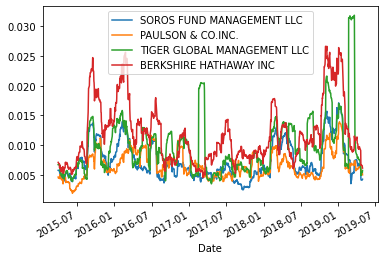

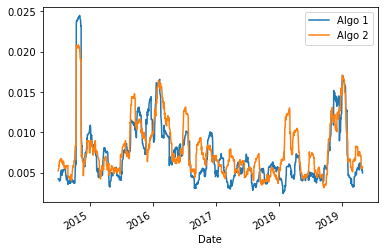

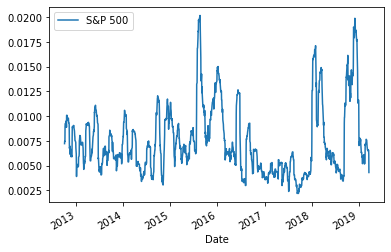

In [23]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
whales_rolling21std = whales_df.rolling(window=21).std()
algo_rolling21std = algo_df.rolling(window=21).std()
sp500_rolling21std = sp500_return.rolling(window = 21).std()
# Plot the rolling standard deviation
whales_rolling21std.plot()
algo_rolling21std.plot()
sp500_rolling21std.plot()

### Calculate and plot the correlation

In [24]:
# Calculate the correlation
correlation = combined_returns.corr()
# Display de correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

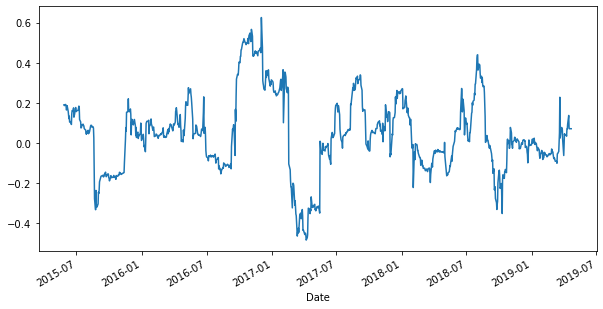

In [25]:
# Calculate covariance of a single portfolio
tiger_covariance = combined_returns['TIGER GLOBAL MANAGEMENT LLC'].cov(combined_returns['S&P 500'])
tiger_rolling60cov = combined_returns['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=60).cov(combined_returns['S&P 500']).dropna()

# Calculate variance of S&P 500
sp500_variance = combined_returns['S&P 500'].var()
sp500_rolling60var = combined_returns['S&P 500'].rolling(window=60).var().dropna()

# Computing beta
tiger_beta = tiger_covariance / sp500_variance
tiger_rolling60beta = tiger_rolling60cov / sp500_rolling60var

# Plot beta trend
tiger_rolling60beta.plot(figsize = (10,5))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [26]:
# Use `ewm` to calculate the rolling window
ewm = combined_returns.ewm(halflife = 21)
ewm

EWM [com=29.799346392775035,min_periods=0,adjust=True,ignore_na=False,axis=0]

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [27]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_returns.mean() * 252) / (combined_returns.std() * np.sqrt(252))

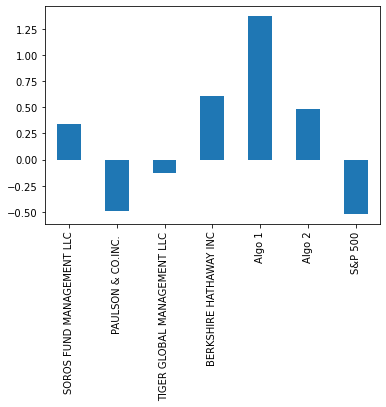

In [28]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = 'bar')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

Yes. They achieved, and maintained, a solid performance in terms of daily returns- especially compared to the whale portfolios. The first algorithm performed so well that it achieved a higher return compared to the S&P 500 with less "risk" (lower std. dev.). Sharpe ratios are also much higher than all the other portfolios.

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [29]:
# Reading data from 1st stock
path_goog = Path("Resources/goog_historical.csv")
goog_df = pd.read_csv(path_goog, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
goog_df.rename(columns={"NOCP": "GOOG"}, inplace=True)

In [30]:
# Reading data from 2nd stock
path_aapl = Path("Resources/aapl_historical.csv")
aapl_df = pd.read_csv(path_aapl, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
aapl_df.rename(columns={"NOCP": "AAPL"}, inplace=True)

In [31]:
# Reading data from 3rd stock
path_cost = Path("Resources/cost_historical.csv")
cost_df = pd.read_csv(path_cost, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
cost_df.rename(columns={"NOCP": "COST"}, inplace=True)

In [32]:
# Combine all stocks in a single DataFrame
portfolio_df = pd.concat([goog_df, aapl_df, cost_df], axis = 'columns', join = "inner")

In [33]:
portfolio_df.index.rename('date', inplace = True)
portfolio_df

,Symbol,GOOG,Symbol,AAPL,Symbol,COST
date,,,,,,
2019-05-09,GOOG,1162.38,AAPL,200.72,COST,243.47
2019-05-08,GOOG,1166.27,AAPL,202.90,COST,241.34
2019-05-07,GOOG,1174.10,AAPL,202.86,COST,240.18
2019-05-06,GOOG,1189.39,AAPL,208.48,COST,244.23
2019-05-03,GOOG,1185.40,AAPL,211.75,COST,244.62
...,...,...,...,...,...,...
2018-05-17,GOOG,1078.59,AAPL,186.99,COST,199.60
2018-05-16,GOOG,1081.77,AAPL,188.18,COST,198.71
2018-05-15,GOOG,1079.23,AAPL,186.44,COST,195.48


In [35]:
# Reset Date index
portfolio_df.rename(columns = {"Trade DATE" : "date"}, inplace = True)

In [36]:
# Reorganize portfolio data by having a column per symbol
portfolio_df.drop(columns = {'Symbol'}, inplace = True)
portfolio_df

,GOOG,AAPL,COST
date,,,
2019-05-09,1162.38,200.72,243.47
2019-05-08,1166.27,202.90,241.34
2019-05-07,1174.10,202.86,240.18
2019-05-06,1189.39,208.48,244.23
2019-05-03,1185.40,211.75,244.62
...,...,...,...
2018-05-17,1078.59,186.99,199.60
2018-05-16,1081.77,188.18,198.71
2018-05-15,1079.23,186.44,195.48


In [37]:
# Calculate daily returns
daily_returns = portfolio_df.pct_change()

# Drop NAs
daily_returns.dropna(inplace=True)

# Display sample data
daily_returns.head()

,GOOG,AAPL,COST
date,,,
2019-05-08,0.003347,0.010861,-0.008749
2019-05-07,0.006714,-0.000197,-0.004806
2019-05-06,0.013023,0.027704,0.016862
2019-05-03,-0.003355,0.015685,0.001597
2019-05-02,-0.019226,-0.012279,-0.007890


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [38]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
weighted_returns = daily_returns.dot(weights)

# Display sample data
weighted_returns.head()

date
2019-05-08    0.001820
2019-05-07    0.000570
2019-05-06    0.019196
2019-05-03    0.004642
2019-05-02   -0.013131
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [39]:
# Join your returns DataFrame to the original returns DataFrame
daily_returns['weighted_returns'] = weighted_returns

In [40]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
daily_returns.dropna(inplace = True)

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [41]:
# Calculate the annualized `std`
volatility = daily_returns.std() * np.sqrt(252)
volatility.sort_values(inplace=True)
volatility

weighted_returns    0.212131
COST                0.213344
GOOG                0.265322
AAPL                0.300387
dtype: float64

### Calculate and plot rolling `std` with 21-day window

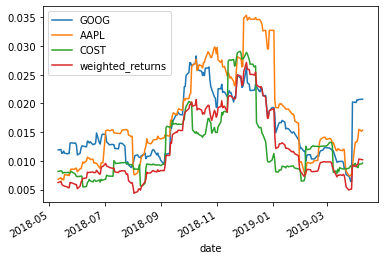

In [42]:
# Calculate rolling standard deviation
port_rolling21std = daily_returns.rolling(window=21).std()
# Plot rolling standard deviation
port_rolling21std.plot()

### Calculate and plot the correlation

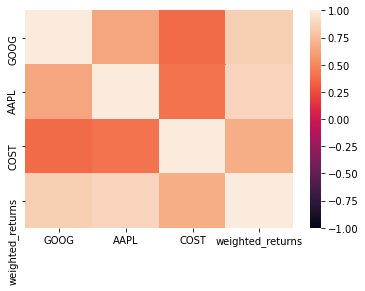

In [43]:
# Calculate and plot the correlation
correlation = daily_returns.corr()
sns.heatmap(correlation, vmin = -1, vmax = 1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

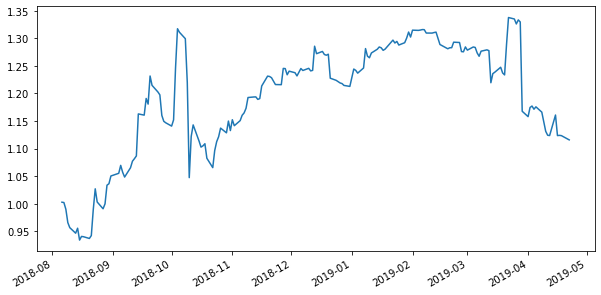

In [44]:
# Calculate and plot Beta
# Calculate covariance of a single portfolio
port_covariance = daily_returns['weighted_returns'].cov(combined_returns['S&P 500'])
port_rolling60cov = daily_returns['weighted_returns'].rolling(window=60).cov(combined_returns['S&P 500']).dropna()

# Computing beta
port_beta = port_covariance / sp500_variance
port_rolling60beta = port_rolling60cov / sp500_rolling60var

# Plot beta trend
port_rolling60beta.plot(figsize = (10,5))

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [45]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios2 = (daily_returns.mean() * 252) / (daily_returns.std() * np.sqrt(252))

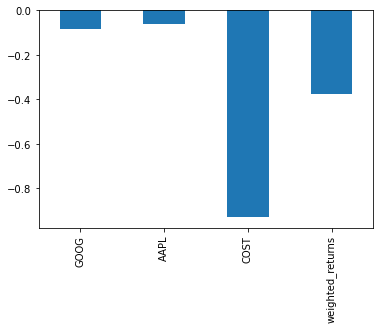

In [46]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios2.plot(kind = 'bar')

### How does your portfolio do?

Write your answer here!

Its performance was much worse than that of the S&P 500: Our risk-return ratio is terrible and our return was, on average, negative in the end.